In [1]:
# Library Get Dataset
import yfinance as yf

# Lib Load Dataset
import numpy as np
import pandas as pd

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)

# Lib Load Data Visualization
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Set Stock Price
ticker = "BTC-USD"

# Get Dataset from yfinance
df = yf.Ticker(ticker).history(start="2015-01-01", end="2024-05-01").reset_index()

# Set Feature OHLC
df = df[["Date", "Open", "High", "Low",	"Close"]]
print(np.round(df,2))

                          Date      Open      High       Low     Close
0    2015-01-01 00:00:00+00:00    320.43    320.43    314.00    314.25
1    2015-01-02 00:00:00+00:00    314.08    315.84    313.57    315.03
2    2015-01-03 00:00:00+00:00    314.85    315.15    281.08    281.08
3    2015-01-04 00:00:00+00:00    281.15    287.23    257.61    264.20
4    2015-01-05 00:00:00+00:00    265.08    278.34    265.08    274.47
...                        ...       ...       ...       ...       ...
3403 2024-04-26 00:00:00+00:00  64485.37  64789.66  63322.40  63755.32
3404 2024-04-27 00:00:00+00:00  63750.99  63898.36  62424.72  63419.14
3405 2024-04-28 00:00:00+00:00  63423.52  64321.48  62793.60  63113.23
3406 2024-04-29 00:00:00+00:00  63106.36  64174.88  61795.46  63841.12
3407 2024-04-30 00:00:00+00:00  63839.42  64703.33  59120.07  60636.86

[3408 rows x 5 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    3408 non-null   datetime64[ns, UTC]
 1   Open    3408 non-null   float64            
 2   High    3408 non-null   float64            
 3   Low     3408 non-null   float64            
 4   Close   3408 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4)
memory usage: 133.3 KB


In [4]:
df['Date']

0      2015-01-01 00:00:00+00:00
1      2015-01-02 00:00:00+00:00
2      2015-01-03 00:00:00+00:00
3      2015-01-04 00:00:00+00:00
4      2015-01-05 00:00:00+00:00
                  ...           
3403   2024-04-26 00:00:00+00:00
3404   2024-04-27 00:00:00+00:00
3405   2024-04-28 00:00:00+00:00
3406   2024-04-29 00:00:00+00:00
3407   2024-04-30 00:00:00+00:00
Name: Date, Length: 3408, dtype: datetime64[ns, UTC]

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df = df.set_index('Date')
df

,Open,High,Low,Close
Date,,,,
2015-01-01 00:00:00+00:00,320.434998,320.434998,314.002991,314.248993
2015-01-02 00:00:00+00:00,314.079010,315.838989,313.565002,315.032013
2015-01-03 00:00:00+00:00,314.846008,315.149994,281.082001,281.082001
2015-01-04 00:00:00+00:00,281.145996,287.230011,257.612000,264.195007
2015-01-05 00:00:00+00:00,265.084015,278.341003,265.084015,274.473999
...,...,...,...,...
2024-04-26 00:00:00+00:00,64485.371094,64789.656250,63322.398438,63755.320312
2024-04-27 00:00:00+00:00,63750.988281,63898.363281,62424.718750,63419.140625
2024-04-28 00:00:00+00:00,63423.515625,64321.484375,62793.597656,63113.230469


In [7]:
df_month = df.asfreq(freq='M')
df_month

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4156\3064680053.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = df.asfreq(freq='M')


,Open,High,Low,Close
Date,,,,
2015-01-31 00:00:00+00:00,226.440994,233.503998,216.309006,217.464005
2015-02-28 00:00:00+00:00,253.520004,254.692001,249.479004,254.263000
2015-03-31 00:00:00+00:00,247.453995,248.729996,242.738998,244.223999
2015-04-30 00:00:00+00:00,225.692993,239.563004,224.992996,236.145004
2015-05-31 00:00:00+00:00,233.134995,233.251999,229.542007,230.190002
...,...,...,...,...
2023-12-31 00:00:00+00:00,42152.097656,42860.937500,41998.253906,42265.187500
2024-01-31 00:00:00+00:00,42946.250000,43717.406250,42298.945312,42582.605469
2024-02-29 00:00:00+00:00,62499.183594,63585.644531,60498.730469,61198.382812


In [8]:
df_year = df.asfreq(freq='Y')
df_year

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4156\2472851957.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_year = df.asfreq(freq='Y')


,Open,High,Low,Close
Date,,,,
2015-12-31 00:00:00+00:00,425.875000,432.920990,418.734985,430.566986
2016-12-31 00:00:00+00:00,960.627014,963.742981,947.236023,963.742981
2017-12-31 00:00:00+00:00,12897.700195,14377.400391,12755.599609,14156.400391
2018-12-31 00:00:00+00:00,3866.839111,3868.742920,3725.867432,3742.700439
2019-12-31 00:00:00+00:00,7294.438965,7335.290039,7169.777832,7193.599121
2020-12-31 00:00:00+00:00,28841.574219,29244.876953,28201.992188,29001.720703
2021-12-31 00:00:00+00:00,47169.371094,48472.527344,45819.953125,46306.445312
2022-12-31 00:00:00+00:00,16603.673828,16628.986328,16517.519531,16547.496094
2023-12-31 00:00:00+00:00,42152.097656,42860.937500,41998.253906,42265.187500


In [9]:
print(df.resample('Y'))

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, origin=start_day]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4156\4002719877.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  print(df.resample('Y'))


In [10]:
# df.Date.resample('Y').ffill()

In [11]:
df_mean = df.Open.resample('Y').mean().ffill()
df_mean

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4156\3209348803.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_mean = df.Open.resample('Y').mean().ffill()


Date
2015-12-31 00:00:00+00:00      272.149011
2016-12-31 00:00:00+00:00      567.141429
2017-12-31 00:00:00+00:00     3970.644848
2018-12-31 00:00:00+00:00     7601.018680
2019-12-31 00:00:00+00:00     7385.218456
2020-12-31 00:00:00+00:00    11056.787201
2021-12-31 00:00:00+00:00    47402.115662
2022-12-31 00:00:00+00:00    28278.690293
2023-12-31 00:00:00+00:00    28788.795848
2024-12-31 00:00:00+00:00    56476.718298
Freq: YE-DEC, Name: Open, dtype: float64

In [12]:
df_mms = df_mean.agg(['mean','median','std'])
df_mms

mean      19179.927973
median     9328.902941
std       20102.775415
Name: Open, dtype: float64

In [13]:
df = df.resample("YE").mean()
df = np.round(df,2).reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


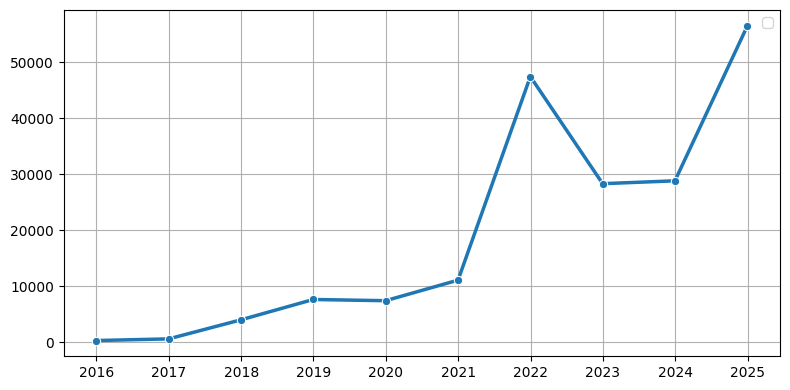

In [14]:
fig, ax = plt.subplots(figsize = (8,4))
sns.lineplot(data=df, x="Date", y="Open", marker='o', linewidth=2.5)

# Set Labels
ax.set_title("", fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.legend(loc="best")
ax.grid(True)

plt.tight_layout()
plt.show()